In [1]:
# import libraries
import pandas as pd
import numpy as np
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout

In [2]:
import os 
os.getcwd()

'C:\\Users\\Chris\\Desktop\\ml-env\\digits'

In [3]:
# Load data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [20]:
# Print first 5 rows
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Data is in form label,pixels

In [21]:
# Check missing values
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

No missing data in both training and testing sets

In [5]:
# Seperate x and y values for training set
# Cast the values inside of the data frame as approrpiate data type
y = train.label.values.astype('int32')
x = train.drop(columns=['label']).values.astype('float32')
print('training set shape: {}'.format(x.shape))
print('training labels shape: {}'.format(y.shape))

training set shape: (42000, 784)
training labels shape: (42000,)


In [6]:
# Create a set of normalized data
scale = np.max(x)
x_norm = x/scale
test_norm = test/scale

Text(0.5, 0, 'Digit')

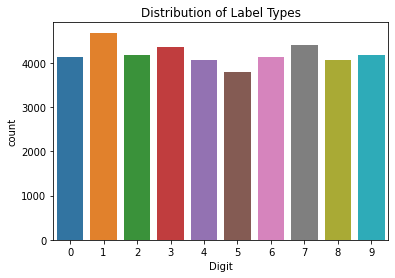

In [24]:
# See the distribution of label types
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=y)
plt.title('Distribution of Label Types')
plt.xlabel('Digit')

Relatively even distribution of digits with the training set having having about 4000 samples per digit

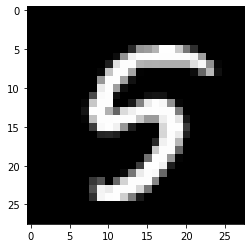

In [25]:
# Print a random image 
import matplotlib.pyplot as plt
# Reshape to a 2-d array with 1 colour channel
image = x[8].reshape(28,28,1)
plt.imshow(image, cmap='gray')

Digits are in black and white. Some are recognizable and some are not so distinct.

In [7]:
# Perform categorical encoding on the training labels
num_categories = 10
y = keras.utils.to_categorical(y, num_categories)

In [8]:
# Split the non-normalized data
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x,y,random_state=69)
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(31500, 784) (31500, 10)
(10500, 784) (10500, 10)


In [9]:
# Create a function to generate predictions in a csv file
def get_preds(model, test_data, filepath):
    '''
    This function take a model, a set of test data, and a file name.
    The model creates predictions based on the test data.
    Then the predictions are placed into a csv file acceptable for submission.
    '''
    # Make prediction and take the max value of each row
    preds = np.argmax(model.predict(test_data),axis=1) # set axis to 1 to analyze each row
    submission = pd.DataFrame({'ImageId':list(range(1,len(test_data)+1)),'Label':preds})
    submission.to_csv(filepath,index=False,header=True)

In [10]:
# Create a basic deep learning model
def base_mlp():
    # Initiate the model
    base_model = Sequential()
    # Add layers
    base_model.add(Dense(512,activation='relu', input_shape=(784,))) # Input layer
    base_model.add(Dense(512, activation= 'relu')) # Hidden layer
    base_model.add(Dense(10, activation= 'sigmoid')) # 10 output nodes corresponding to 10 labels
    # Return the model with all layers
    return base_model

In [11]:
base_model = base_mlp()
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compile the model
base_model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
# Fit the model
base_hist = base_model.fit(
    x_train, y_train, epochs=10, verbose=1, validation_data=(x_val, y_val))

Epoch 1/10
985/985 [==============================] - 5s 4ms/step - loss: 2.5117 - accuracy: 0.8876 - val_loss: 0.4901 - val_accuracy: 0.9237
Epoch 2/10
985/985 [==============================] - 4s 4ms/step - loss: 0.3131 - accuracy: 0.9427 - val_loss: 0.3410 - val_accuracy: 0.9412
Epoch 3/10
985/985 [==============================] - 4s 4ms/step - loss: 0.2077 - accuracy: 0.9511 - val_loss: 0.2891 - val_accuracy: 0.9491
Epoch 4/10
985/985 [==============================] - 4s 4ms/step - loss: 0.1871 - accuracy: 0.9556 - val_loss: 0.2903 - val_accuracy: 0.9429
Epoch 5/10
985/985 [==============================] - 4s 4ms/step - loss: 0.1841 - accuracy: 0.9565 - val_loss: 0.2676 - val_accuracy: 0.9428
Epoch 6/10
985/985 [==============================] - 4s 4ms/step - loss: 0.1592 - accuracy: 0.9620 - val_loss: 0.2017 - val_accuracy: 0.9512
Epoch 7/10
985/985 [==============================] - 4s 4ms/step - loss: 0.1412 - accuracy: 0.9648 - val_loss: 0.2954 - val_accuracy: 0.9361
Epoch 

In [33]:
# Print the metrics    
loss,accuracy = base_model.evaluate(x_train,y_train,verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss,accuracy = base_model.evaluate(x_val, y_val, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

Training Accuracy: 0.9660
Training Accuracy: 0.9499


In [14]:
import sys
sys.path.append('C:\\Users\\Chris\\Desktop\\ml-env\\scripts')
from plot_history import plot_history

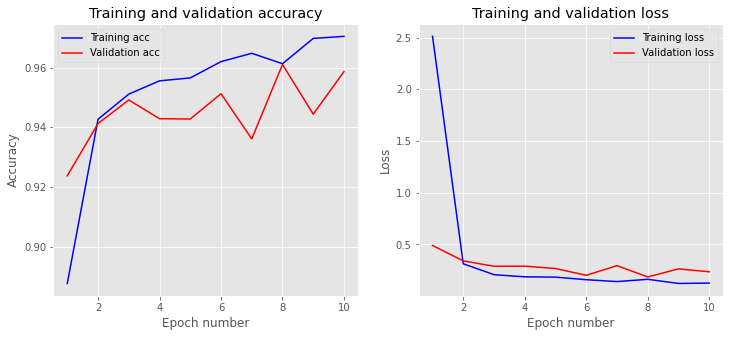

In [15]:
# Plot the improvements over time
plot_history(base_hist)

In [16]:
# Clear session
from keras.backend import clear_session
clear_session()

In [17]:
# Create a model with dropout layers
def drop_mlp():
    drop_model = Sequential()
    drop_model.add(Dense(512,activation='relu', input_shape=(784,))) # Input layer
    drop_model.add(Dropout(0.15)) # Ignore a random 20% of neurons in each step
    drop_model.add(Dense(512, activation= 'relu')) # Hidden layer
    drop_model.add(Dropout(0.2))
    drop_model.add(Dense(10, activation= 'sigmoid')) # 10 output nodes corresponding to 10 labels
    return drop_model

In [18]:
drop_model = drop_mlp()
drop_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compile and fit the model
drop_model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
drop_hist = drop_model.fit(
    x_train, y_train, epochs=10, verbose=1, validation_data=(x_val, y_val))

Epoch 1/10
985/985 [==============================] - 5s 4ms/step - loss: 3.2932 - accuracy: 0.8597 - val_loss: 0.3790 - val_accuracy: 0.9339
Epoch 2/10
985/985 [==============================] - 4s 4ms/step - loss: 0.4425 - accuracy: 0.9111 - val_loss: 0.2376 - val_accuracy: 0.9388
Epoch 3/10
985/985 [==============================] - 4s 4ms/step - loss: 0.2940 - accuracy: 0.9280 - val_loss: 0.2095 - val_accuracy: 0.9475
Epoch 4/10
985/985 [==============================] - 4s 4ms/step - loss: 0.2867 - accuracy: 0.9298 - val_loss: 0.1837 - val_accuracy: 0.9519
Epoch 5/10
985/985 [==============================] - 4s 4ms/step - loss: 0.2666 - accuracy: 0.9348 - val_loss: 0.2213 - val_accuracy: 0.9424
Epoch 6/10
985/985 [==============================] - 4s 4ms/step - loss: 0.2788 - accuracy: 0.9318 - val_loss: 0.2303 - val_accuracy: 0.9451
Epoch 7/10
985/985 [==============================] - 4s 4ms/step - loss: 0.2679 - accuracy: 0.9355 - val_loss: 0.2514 - val_accuracy: 0.9474
Epoch 

In [38]:
# Print the metrics    
loss,accuracy = drop_model.evaluate(x_train,y_train,verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss,accuracy = drop_model.evaluate(x_val, y_val, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

Training Accuracy: 0.9665
Training Accuracy: 0.9551


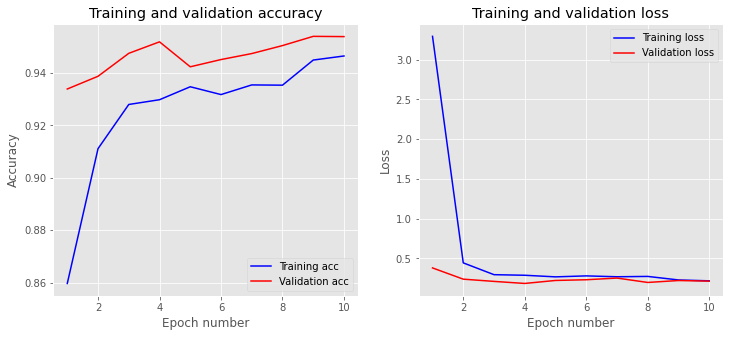

In [20]:
plot_history(drop_hist)

The dropout model had about 1% less performance than the base MLP model

In [21]:
# Split the normalized data
x_train, x_val, y_train, y_val = train_test_split(x_norm,y,random_state=69)
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(31500, 784) (31500, 10)
(10500, 784) (10500, 10)


In [22]:
# Create a model using the normalized data
norm_base_model = base_mlp()
norm_base_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compile and fit the model
norm_base_model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
norm_base_hist = norm_base_model.fit(
    x_train, y_train, epochs=10, verbose=1, validation_data=(x_val, y_val))

Epoch 1/10
985/985 [==============================] - 4s 4ms/step - loss: 0.2345 - accuracy: 0.9293 - val_loss: 0.1516 - val_accuracy: 0.9504
Epoch 2/10
985/985 [==============================] - 4s 4ms/step - loss: 0.0959 - accuracy: 0.9704 - val_loss: 0.1134 - val_accuracy: 0.9639
Epoch 3/10
985/985 [==============================] - 4s 4ms/step - loss: 0.0639 - accuracy: 0.9797 - val_loss: 0.1155 - val_accuracy: 0.9678
Epoch 4/10
985/985 [==============================] - 4s 4ms/step - loss: 0.0462 - accuracy: 0.9853 - val_loss: 0.0930 - val_accuracy: 0.9730
Epoch 5/10
985/985 [==============================] - 4s 4ms/step - loss: 0.0385 - accuracy: 0.9875 - val_loss: 0.1287 - val_accuracy: 0.9670
Epoch 6/10
985/985 [==============================] - 4s 4ms/step - loss: 0.0329 - accuracy: 0.9901 - val_loss: 0.1171 - val_accuracy: 0.9730
Epoch 7/10
985/985 [==============================] - 4s 4ms/step - loss: 0.0274 - accuracy: 0.9911 - val_loss: 0.1417 - val_accuracy: 0.9664
Epoch 

In [42]:
# Print the metrics    
loss,accuracy = norm_base_model.evaluate(x_train,y_train,verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss,accuracy = norm_base_model.evaluate(x_val, y_val, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

Training Accuracy: 0.9950
Training Accuracy: 0.9737


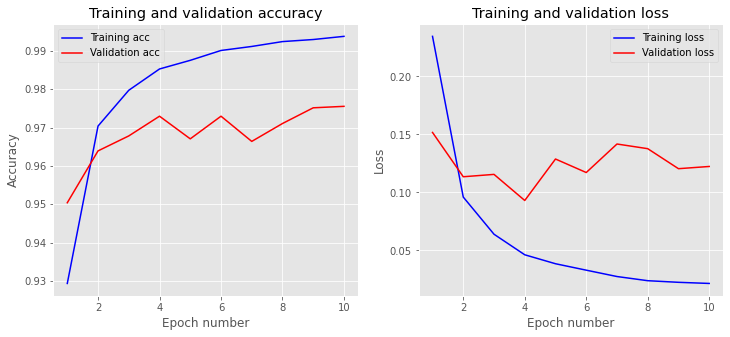

In [24]:
plot_history(norm_base_hist)

In [25]:
clear_session()

In [26]:
norm_drop_model = drop_mlp()
norm_drop_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Compile and fit the model
norm_drop_model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
norm_drop_hist = norm_drop_model.fit(
    x_train, y_train, epochs=10, verbose=1, validation_data=(x_val, y_val))

Epoch 1/10
985/985 [==============================] - 5s 4ms/step - loss: 0.2609 - accuracy: 0.9221 - val_loss: 0.1409 - val_accuracy: 0.9564
Epoch 2/10
985/985 [==============================] - 4s 4ms/step - loss: 0.1169 - accuracy: 0.9638 - val_loss: 0.1031 - val_accuracy: 0.9678
Epoch 3/10
985/985 [==============================] - 5s 5ms/step - loss: 0.0828 - accuracy: 0.9740 - val_loss: 0.1060 - val_accuracy: 0.9678
Epoch 4/10
985/985 [==============================] - 4s 4ms/step - loss: 0.0659 - accuracy: 0.9790 - val_loss: 0.1034 - val_accuracy: 0.9719
Epoch 5/10
985/985 [==============================] - 4s 4ms/step - loss: 0.0546 - accuracy: 0.9826 - val_loss: 0.1123 - val_accuracy: 0.9683
Epoch 6/10
985/985 [==============================] - 4s 4ms/step - loss: 0.0489 - accuracy: 0.9831 - val_loss: 0.1010 - val_accuracy: 0.9736
Epoch 7/10
985/985 [==============================] - 4s 4ms/step - loss: 0.0407 - accuracy: 0.9869 - val_loss: 0.1042 - val_accuracy: 0.9736
Epoch 

In [46]:
# Print the metrics    
loss,accuracy = norm_drop_model.evaluate(x_train,y_train,verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss,accuracy = norm_drop_model.evaluate(x_val, y_val, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

Training Accuracy: 0.9942
Training Accuracy: 0.9769


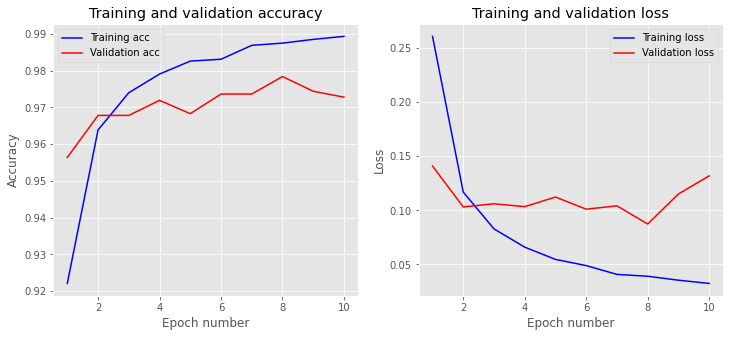

In [28]:
plot_history(norm_drop_hist)

When the data is normalized, the model with a dropout layer performs marginally better than the base model. Regardless, normalizing the data increases performance by 1-2%

In [47]:
# Save the best models
get_preds(base_model,test,'submissions//digits_base_mlp.csv')
get_preds(norm_drop_model,test_norm,'submissions//digits_norm_drop_mlp.csv')

In [48]:
clear_session()